<a href="https://colab.research.google.com/github/isshii/de4test/blob/master/LIME/LIME_for_relearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 方針
* LIME にかけるモデルを、DeepXproreで使ってるモデルに変更する
* 摂動を加えた画像を読み込んで、それぞれのモデルがどう判断しているのかを見る

In [0]:
# ドライブをマウントする
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras_applications.imagenet_utils import preprocess_input as preprocess_input
import os, re
import random
import keras
# models
from keras.applications import inception_v3 as inc_net
from keras.applications import inception_resnet_v2 as inc_res

from keras.applications import resnet50 as resnet50
# from keras.applications.resnet50 import ResNet50
# from keras.applications.resnet50 import preprocess_input, decode_predictions

from keras.applications import vgg16 as vgg16

# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input

from keras.applications import vgg19 as vgg19
# from keras.applications.vgg19 import VGG19
# from keras.applications.vgg19 import preprocess_input

from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions

from keras.layers import Input

from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Using TensorFlow backend.


Notebook run using keras: 2.2.5


In [0]:
img_rows, img_cols = 224, 224
# img_rows, img_cols = 299, 299
input_shape = (img_rows, img_cols, 3)

# define input tensor as a placeholder
input_tensor = Input(shape=input_shape)


モデルの設定
ここに「再学習前の誤判断モデル」「再学習後のモデル」を設定する

In [0]:
#######################
# モデルの設定
#######################
model1 = vgg16.VGG16(input_tensor=input_tensor)
model2 = vgg19.VGG19(input_tensor=input_tensor)
model3 = resnet50.ResNet50(input_tensor=input_tensor)


In [0]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
#        img = image.load_img(img_path, target_size=(299, 299))
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
#        x = inc_net.preprocess_input(x)
#        x = vgg16.preprocess_input(x,mode='tf')
        x = vgg16.preprocess_input(x)
        plt.imshow(img)
        out.append(x)
    return np.vstack(out)

def transform_img_fn2(path_list):
    out = []
    for img_path in path_list:
#        img = image.load_img(img_path, target_size=(299, 299))
        img = image.load_img(img_path, target_size=(224, 224))
        plt.imshow(img)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
#        x = inc_net.preprocess_input(x)
#        x = vgg16.preprocess_input(x,mode='tf')
        x = vgg16.preprocess_input(x)
        out.append(x)
    return np.vstack(out)


def list_pictures(directory, ext='jpg|jpeg|bmp|png|ppm'):
    return [os.path.join(root, f)
            for root, _, files in os.walk(directory) for f in files
            if re.match(r'([\w]+\.(?:' + ext + '))', f.lower())]

画像の読み込みと、予測を行う
ここに摂動を加えた画像を渡して、それぞれのモデルに読み込ませて予測を行う

model1 : genterated
('n03482405', 'hamper', 0.68773186)
('n02123045', 'tabby', 0.12617294)
('n02124075', 'Egyptian_cat', 0.05159268)
('n02123159', 'tiger_cat', 0.042646747)
('n04204238', 'shopping_basket', 0.01960934)
model2 :  genterated
('n03482405', 'hamper', 0.44969496)
('n02123045', 'tabby', 0.18738961)
('n02124075', 'Egyptian_cat', 0.1463996)
('n02123159', 'tiger_cat', 0.063485436)
('n04204238', 'shopping_basket', 0.06025436)
model3 : genterated
('n03482405', 'hamper', 0.92239726)
('n04204238', 'shopping_basket', 0.053204663)
('n02123045', 'tabby', 0.009959025)
('n02909870', 'bucket', 0.0037444492)
('n02123159', 'tiger_cat', 0.0034779431)
model1 : origin
('n03482405', 'hamper', 0.77808577)
('n02123045', 'tabby', 0.093991786)
('n02124075', 'Egyptian_cat', 0.028196001)
('n02123159', 'tiger_cat', 0.023368042)
('n04204238', 'shopping_basket', 0.020688845)
model2 :  origin
('n03482405', 'hamper', 0.6862744)
('n02123045', 'tabby', 0.0848931)
('n02124075', 'Egyptian_cat', 0.072513685)
(

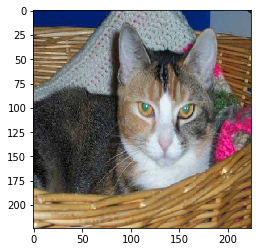

In [0]:
#######################
# 画像の読み込みと予測
#######################
images = transform_img_fn([os.path.join('/content/drive/My Drive/ColabNotebooks/test4ai/deepxprore_with_lime/ImageNet/generated_inputs/sameimg','occl_hamper_washer_hamper.png')])
images_orig = transform_img_fn([os.path.join('/content/drive/My Drive/ColabNotebooks/test4ai/deepxprore_with_lime/ImageNet/generated_inputs/sameimg','occl_hamper_washer_hamper_orig.png')])
preds1 = model1.predict(images)
preds2 = model2.predict(images)
preds3 = model3.predict(images)
print("model1 : genterated")
for x in decode_predictions(preds1)[0]:
    print(x)

print("=============================================")
print("model2 :  genterated")
for x in decode_predictions(preds2)[0]:
  print(x)

print("=============================================")
print("model3 : genterated")
for x in decode_predictions(preds3)[0]:
    print(x)


preds1_orig = model1.predict(images_orig)
preds2_orig = model2.predict(images_orig)
preds3_orig = model3.predict(images_orig)

print("=============================================")
print("model1 : origin")
for x in decode_predictions(preds1_orig)[0]:
    print(x)

print("=============================================")
print("model2 :  origin")
for x in decode_predictions(preds2_orig)[0]:
  print(x)

print("=============================================")
print("model3 : origin")
for x in decode_predictions(preds3_orig)[0]:
    print(x)


```
plt.imshow(images[0] / 300 + 0.5)
```
 の `300 + 0.5` など数字部分を変更することで、ある程度前処理した画像の見栄えをよくできるので、見栄えが悪い場合はチューニングしてください。


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


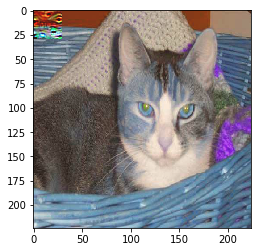

In [0]:
plt.imshow(images[0] / 300 + 0.5)
# plt.imshow(images[0] / 2 + 0.5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


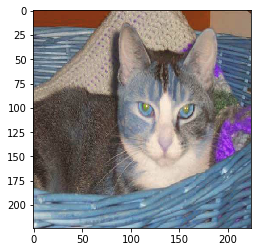

In [0]:

plt.imshow(images_orig[0] / 300 + 0.5)


# LIME のインストール

In [0]:
! pip install lime
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
%%time
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
model1_explanation = explainer.explain_instance(images[0], model1.predict, top_labels=5, hide_color=0, num_samples=1000)
model1_explanation_orig = explainer.explain_instance(images_orig[0], model1.predict, top_labels=5, hide_color=0, num_samples=1000)
model2_explanation = explainer.explain_instance(images[0], model2.predict, top_labels=5, hide_color=0, num_samples=1000)
model2_explanation_orig = explainer.explain_instance(images_orig[0], model2.predict, top_labels=5, hide_color=0, num_samples=1000)
model3_explanation = explainer.explain_instance(images[0], model3.predict, top_labels=5, hide_color=0, num_samples=1000)
model3_explanation_orig = explainer.explain_instance(images_orig[0], model3.predict, top_labels=5, hide_color=0, num_samples=1000)


CPU times: user 1min 54s, sys: 9.72 s, total: 2min 4s
Wall time: 2min 25s


```
model1_explanation.get_image_and_mask(model1_explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
```
 `positive_only` -> True の場合、判断に寄与したもの（猫なら猫と判断する根拠となったもの）のみを表示、False の場合、判断に寄与したものを緑、寄与しなかったものを赤で表示
 
 `hide_rest` -> True：背景を隠し、判断箇所のみ表示。False：背景と判断箇所両方を表示。


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


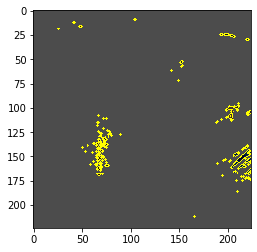

In [0]:
from skimage.segmentation import mark_boundaries
temp, mask = model1_explanation.get_image_and_mask(model1_explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


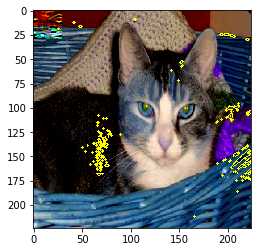

In [0]:
temp, mask = model1_explanation.get_image_and_mask(model1_explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


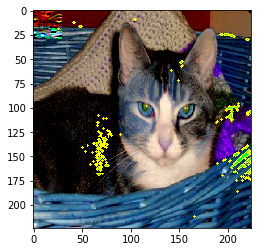

In [0]:
temp, mask = model1_explanation.get_image_and_mask(model1_explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


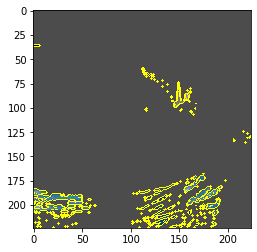

In [0]:
# print("================")
# print("model 1 origine input")
temp, mask = model1_explanation_orig.get_image_and_mask(model1_explanation_orig.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


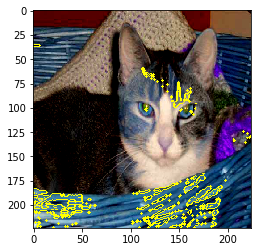

In [0]:
temp, mask = model1_explanation_orig.get_image_and_mask(model1_explanation_orig.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


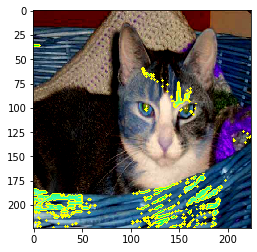

In [0]:

temp, mask = model1_explanation_orig.get_image_and_mask(model1_explanation_orig.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


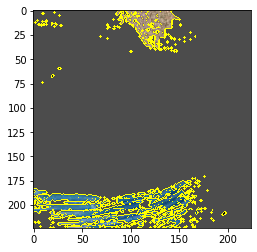

In [0]:
# print("================")
# print("model 2 generated input")
temp, mask = model2_explanation.get_image_and_mask(model2_explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


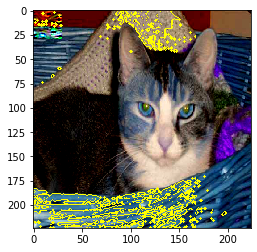

In [0]:
temp, mask = model2_explanation.get_image_and_mask(model2_explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


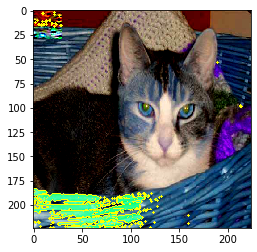

In [0]:
temp, mask = model2_explanation.get_image_and_mask(model2_explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


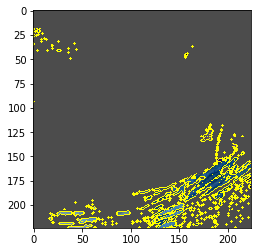

In [0]:
# print("================")
# print("model 2 origine input")
temp, mask = model2_explanation_orig.get_image_and_mask(model2_explanation_orig.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


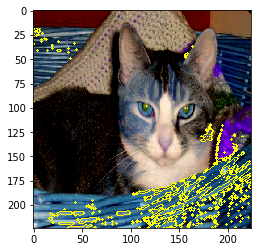

In [0]:
temp, mask = model2_explanation_orig.get_image_and_mask(model2_explanation_orig.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


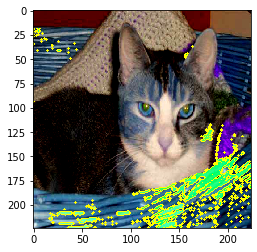

In [0]:
temp, mask = model2_explanation_orig.get_image_and_mask(model2_explanation_orig.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


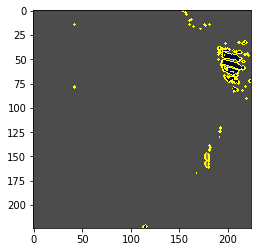

In [0]:
# print("================")
# print("model 3 generated input")
temp, mask = model3_explanation.get_image_and_mask(model3_explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


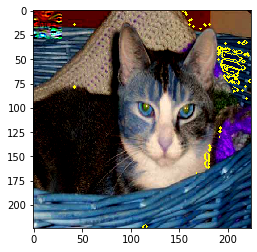

In [0]:
temp, mask = model3_explanation.get_image_and_mask(model3_explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


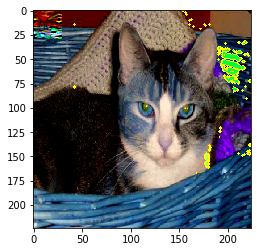

In [0]:
temp, mask = model3_explanation.get_image_and_mask(model3_explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


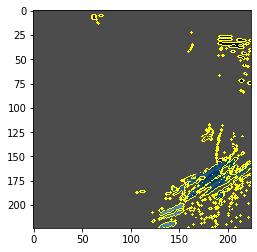

In [0]:
# print("================")
# print("model 3 origine input")
temp, mask = model3_explanation_orig.get_image_and_mask(model3_explanation_orig.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


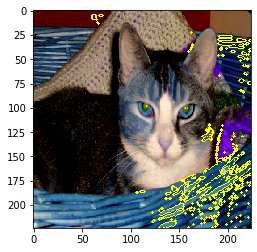

In [0]:
temp, mask = model3_explanation_orig.get_image_and_mask(model3_explanation_orig.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


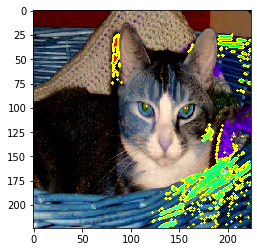

In [0]:
temp, mask = model3_explanation_orig.get_image_and_mask(model3_explanation_orig.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
#plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(mark_boundaries(temp / 200 + 0.3, mask))
